<a href="https://colab.research.google.com/github/zacharywendholt/CSCI-B455-Final/blob/master/pokemonBattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Flatten
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder

pokemonURL = 'https://raw.githubusercontent.com/zacharywendholt/CSCI-B455-Final/master/pokemon-challenge/pokemon.csv'
pokemonData = pd.read_csv(pokemonURL)


In [0]:
pokemonData.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


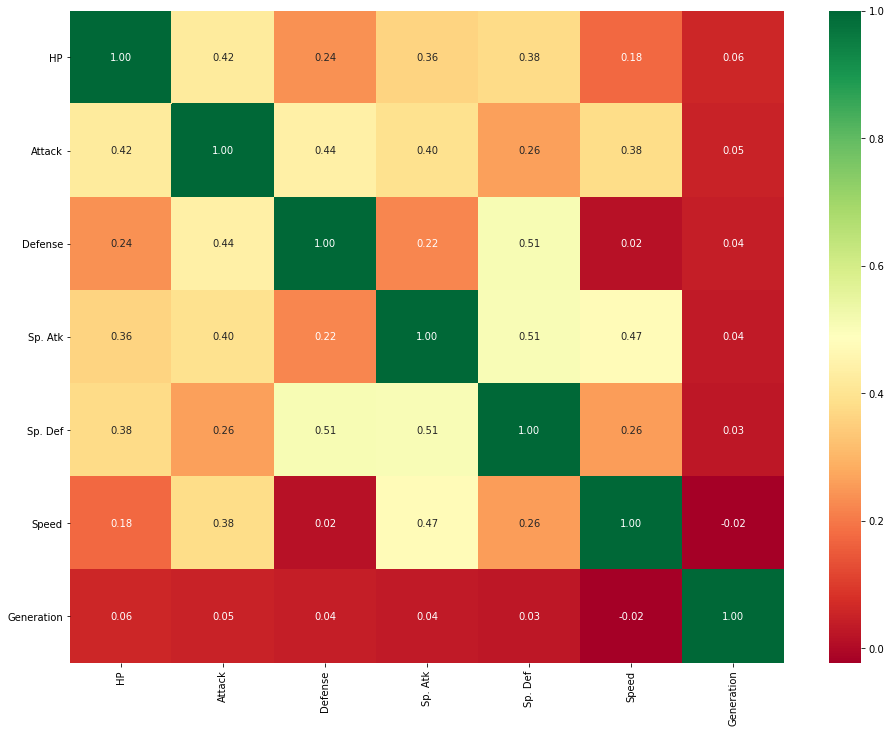

In [0]:
feat_names = pokemonData.columns[2:-1]
X = pokemonData[feat_names]
#wanna predict legendary
y = pokemonData.Legendary


encoder = LabelEncoder()
# M = 1 and B = 0
y = encoder.fit_transform(pokemonData.Legendary.values)


#create a heatmap to show relationship
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(16, 12)

plt.show()

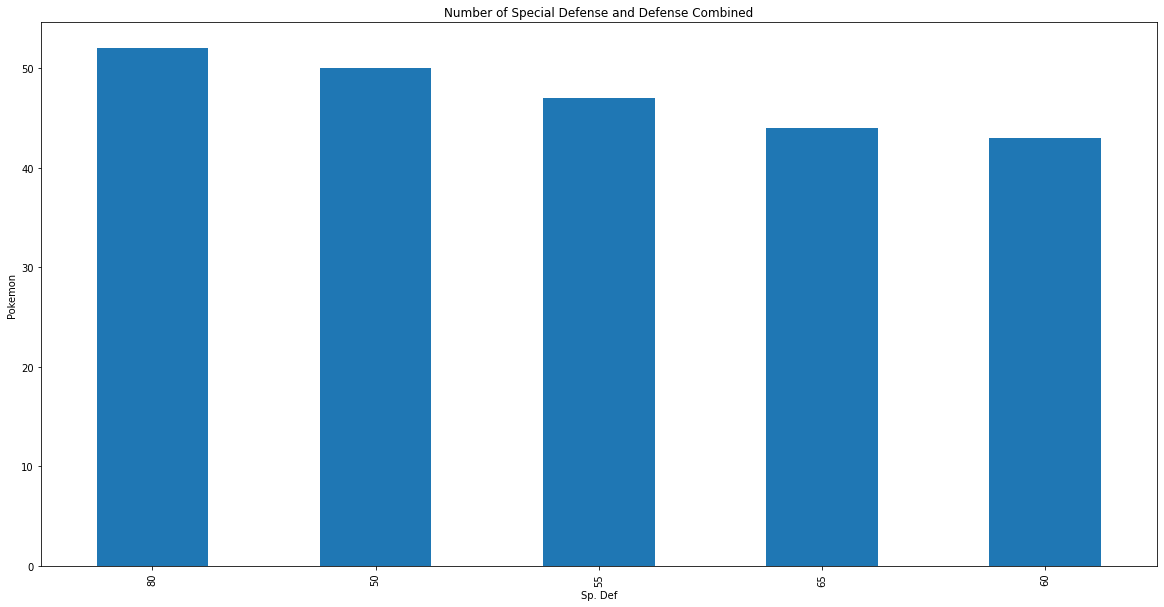

In [0]:
s = pokemonData[pokemonData["Defense"] >= 0.50]["Sp. Def"].value_counts().head(5)
plt.title("Number of Special Defense and Defense Combined")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("Sp. Def")
plt.ylabel("Pokemon")
plt.show()

In [0]:
#re-assigning names to these columns because they have spaces in their name
pokemonData.rename(columns={"Type 1": "Type1"}, inplace=True)
pokemonData.rename(columns={"Type 2": "Type2"}, inplace=True)
# order of legendary pokemon is not randomized. Need to make sure we randomize 
# when we test we need to make sure there is a mix of both legendary and not legendary
cols = pokemonData.columns[2:len(pokemonData.columns)-1]
balancedSample = pd.DataFrame(pokemonData.loc[pokemonData['Legendary'] == True])
nonLegendaries = pd.DataFrame(pokemonData.loc[pokemonData['Legendary'] == False])

#there are 65 legendary pokemon in this dataset. I found the best way would be to take all of the legendaries, and 65 random normal pokemon to compare. 
nonLegendaries = nonLegendaries.sample(n = len(balancedSample))
balancedSample = balancedSample.append(nonLegendaries)
print(balancedSample)

#changing the string values for type to integer values
le = preprocessing.LabelEncoder()
balancedSample.Type1 = le.fit_transform(balancedSample.Type1)

#type 2 has null values so fill them with na
balancedSample.Type2 = balancedSample.Type2.fillna(method= "ffill")
balancedSample.Type2 = le.fit_transform(balancedSample.Type2)

x = balancedSample.loc[:, cols]
y = balancedSample.Legendary

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=42)



       #           Name     Type1  ... Speed  Generation  Legendary
156  157       Articuno       Ice  ...    85           1       True
157  158         Zapdos  Electric  ...   100           1       True
158  159        Moltres      Fire  ...    90           1       True
162  163         Mewtwo   Psychic  ...   130           1       True
163  164  Mega Mewtwo X   Psychic  ...   130           1       True
..   ...            ...       ...  ...   ...         ...        ...
56    57        Dugtrio    Ground  ...   120           1      False
746  747  Meowstic Male   Psychic  ...   104           6      False
205  206          Aipom    Normal  ...    85           2      False
503  504       Croagunk    Poison  ...    50           4      False
57    58         Meowth    Normal  ...    90           1      False

[130 rows x 12 columns]


In [0]:
model = Sequential()
model.add(Dense(15, input_dim = len(cols), activation='softmax'))
model.add(Dense(1, input_dim = 15, activation = 'relu'))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics =['accuracy'])

In [0]:
model.fit(x_train,y_train, epochs=15, batch_size = 32, validation_data= (x_test, y_test))

_, accuracy = model.evaluate(x_test,y_test)

print("Accuracy: ",accuracy)



Train on 91 samples, validate on 39 samples
Epoch 1/15
91/91 [==============================] - 0s 134us/step - loss: 0.2031 - accuracy: 0.7912 - val_loss: 0.2230 - val_accuracy: 0.7692
Epoch 2/15
91/91 [==============================] - 0s 98us/step - loss: 0.2025 - accuracy: 0.7912 - val_loss: 0.2206 - val_accuracy: 0.7692
Epoch 3/15
91/91 [==============================] - 0s 90us/step - loss: 0.2020 - accuracy: 0.7912 - val_loss: 0.2206 - val_accuracy: 0.7692
Epoch 4/15
91/91 [==============================] - 0s 101us/step - loss: 0.2008 - accuracy: 0.7912 - val_loss: 0.2225 - val_accuracy: 0.7692
Epoch 5/15
91/91 [==============================] - 0s 101us/step - loss: 0.2008 - accuracy: 0.7912 - val_loss: 0.2217 - val_accuracy: 0.7692
Epoch 6/15
91/91 [==============================] - 0s 106us/step - loss: 0.1996 - accuracy: 0.8022 - val_loss: 0.2191 - val_accuracy: 0.7692
Epoch 7/15
91/91 [==============================] - 0s 96us/step - loss: 0.1992 - accuracy: 0.8022 - val_l